In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
import seaborn as sns
import joblib
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#dataset 
df=pd.read_csv("/home/sonu/Downloads/insurance/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# EDA  and Preprocessing

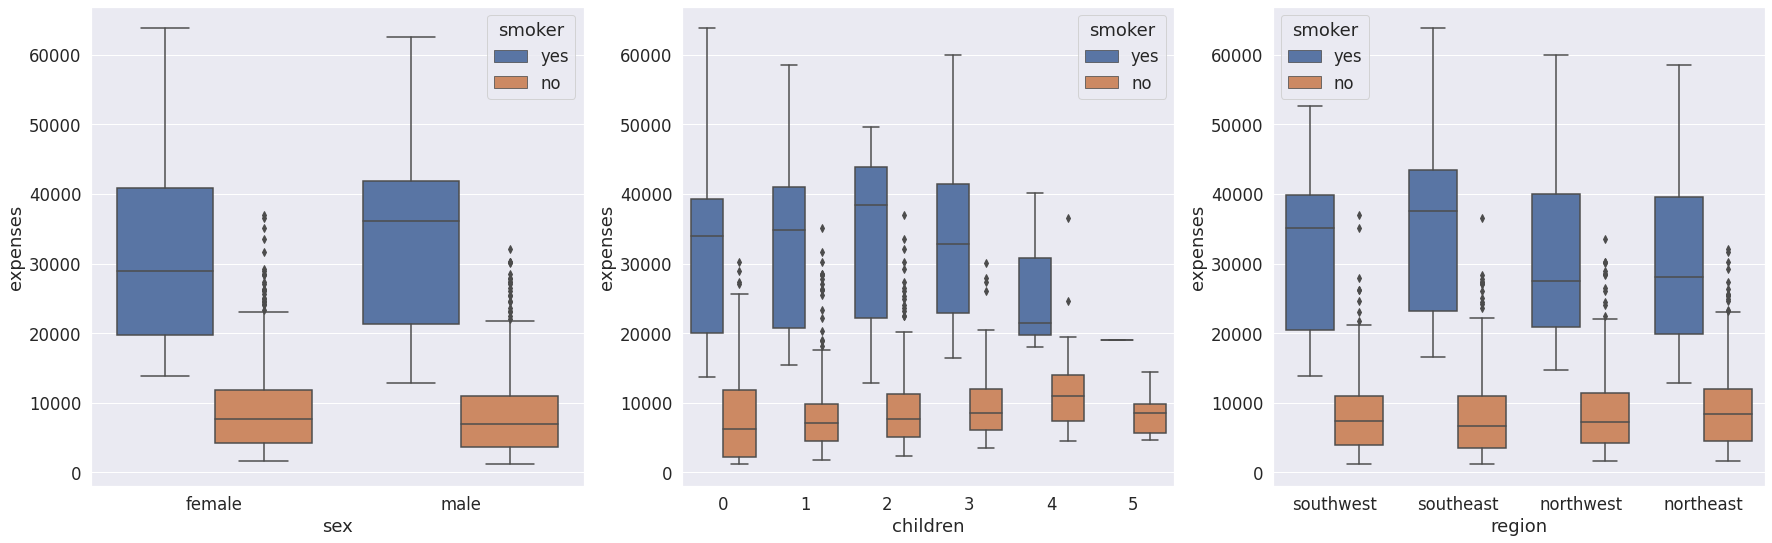

In [8]:
#plotting outliers
sns.set(font_scale=1.5)
plt.figure(figsize=(30,30))

for i, col in enumerate(['sex','children','region'], 1):
    plt.subplot(3,3, i)
    plot = sns.boxplot(x=f"{col}", y='expenses',hue='smoker',data=df)
    plot.set_xticklabels(plot.get_xticklabels())
    plt.ylabel('expenses')
    plt.xlabel(f'{col}')

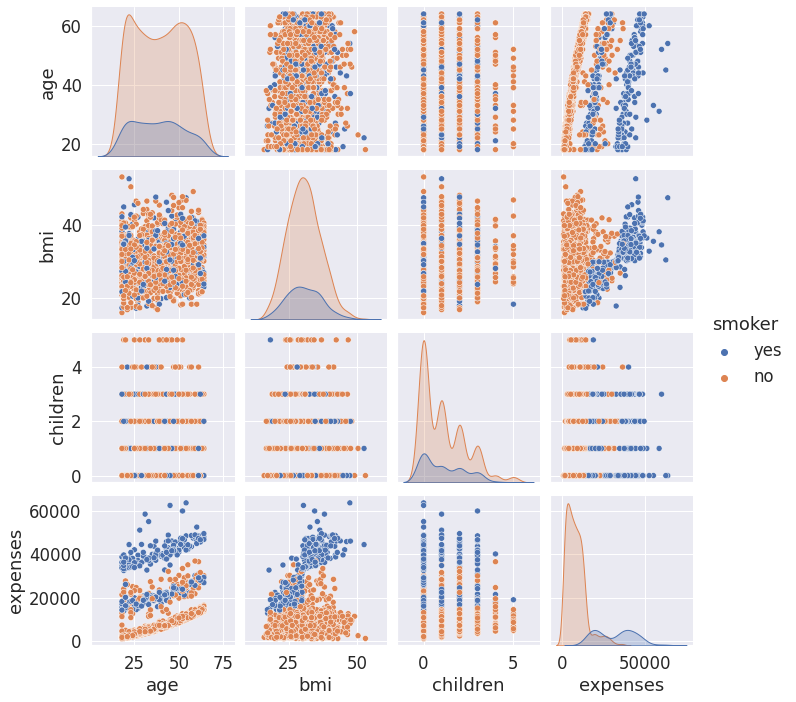

In [9]:
sns.pairplot(df,hue='smoker')


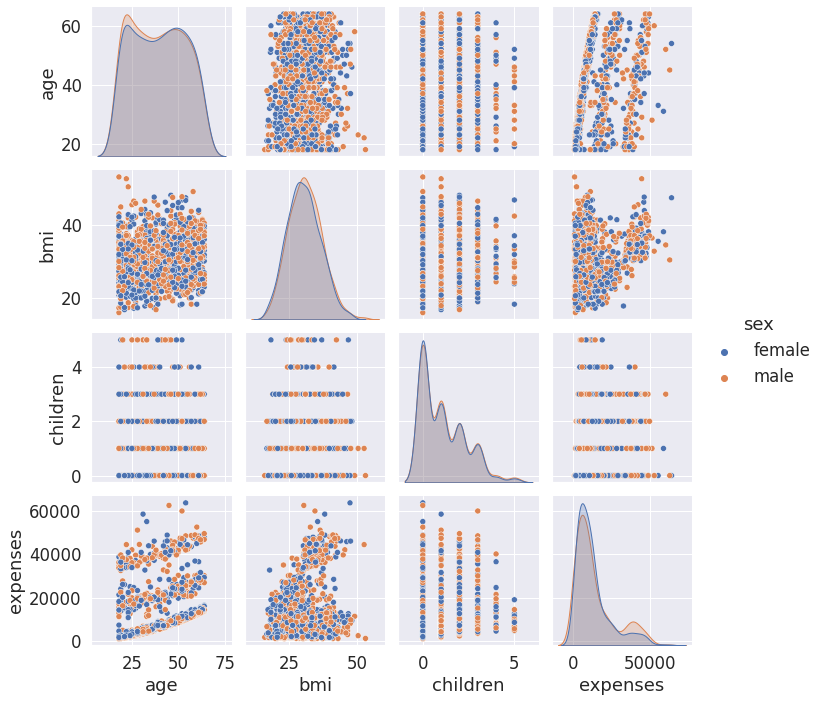

In [10]:
sns.pairplot(df,hue='sex')


<AxesSubplot:xlabel='age', ylabel='expenses'>

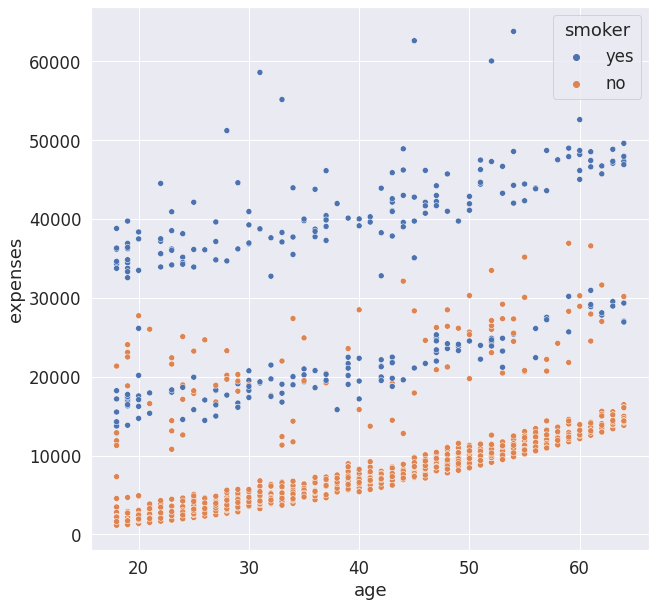

In [11]:
# Visualize expenses vs age, and expenses vs smoking 
plt.figure(figsize=(10,10))

sns.scatterplot(data=df, x=df['age'], y=df['expenses'], hue=df['smoker'])


<AxesSubplot:xlabel='bmi', ylabel='expenses'>

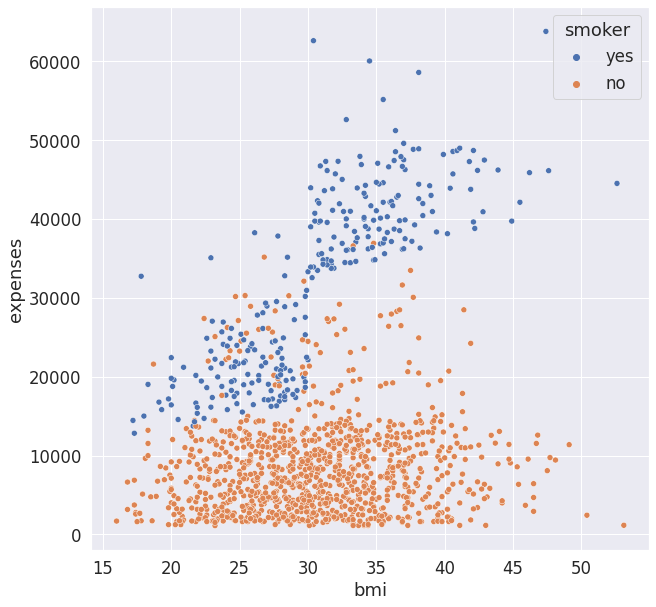

In [12]:

# scatter plot between bmi and expenses
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x=df['bmi'], y=df['expenses'],hue=df['smoker'])


<AxesSubplot:xlabel='smoker', ylabel='expenses'>

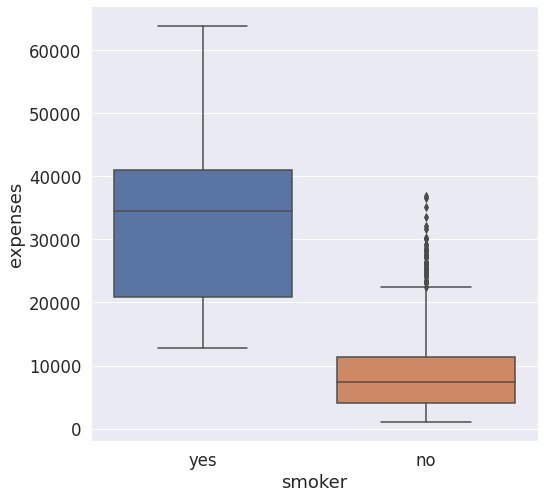

In [13]:
#boxplot between smoker and expenses
plt.figure(figsize=(8,8))

sns.boxplot(data=df, x=df['smoker'], y=df['expenses'])


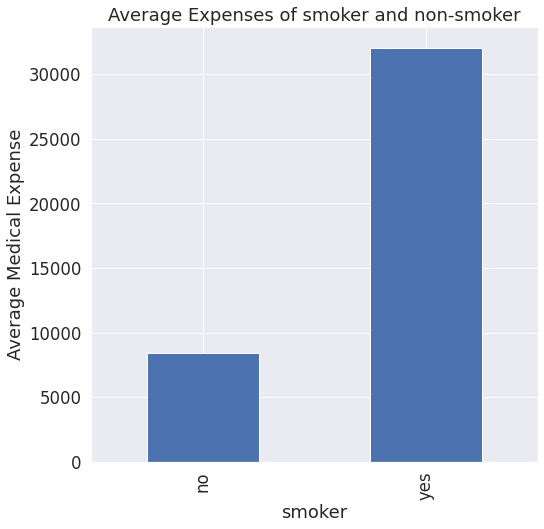

In [14]:
# Medical Expenses of smoker vs non smoker
plt.figure(figsize=(8,8))
df.groupby(['smoker'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of smoker and non-smoker")
plt.show()

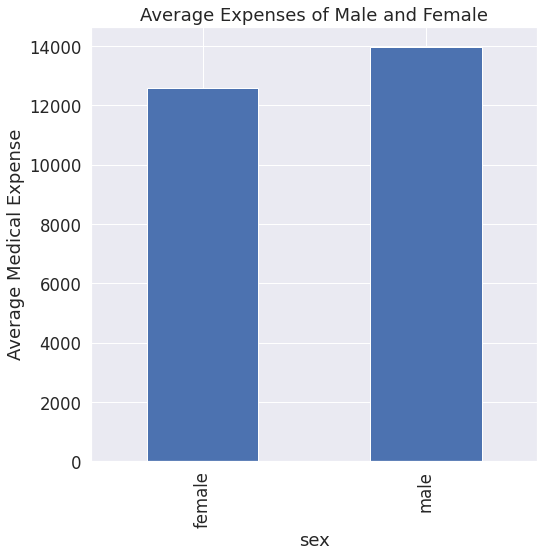

In [15]:
# Medical Expenses of male and female
plt.figure(figsize=(8,8))
df.groupby(['sex'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of Male and Female")
plt.show()

In [16]:
#one-hot-encoding of categorical features
df_new = pd.get_dummies(df, columns = ['sex','smoker', 'region'])
df_new.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


<AxesSubplot:>

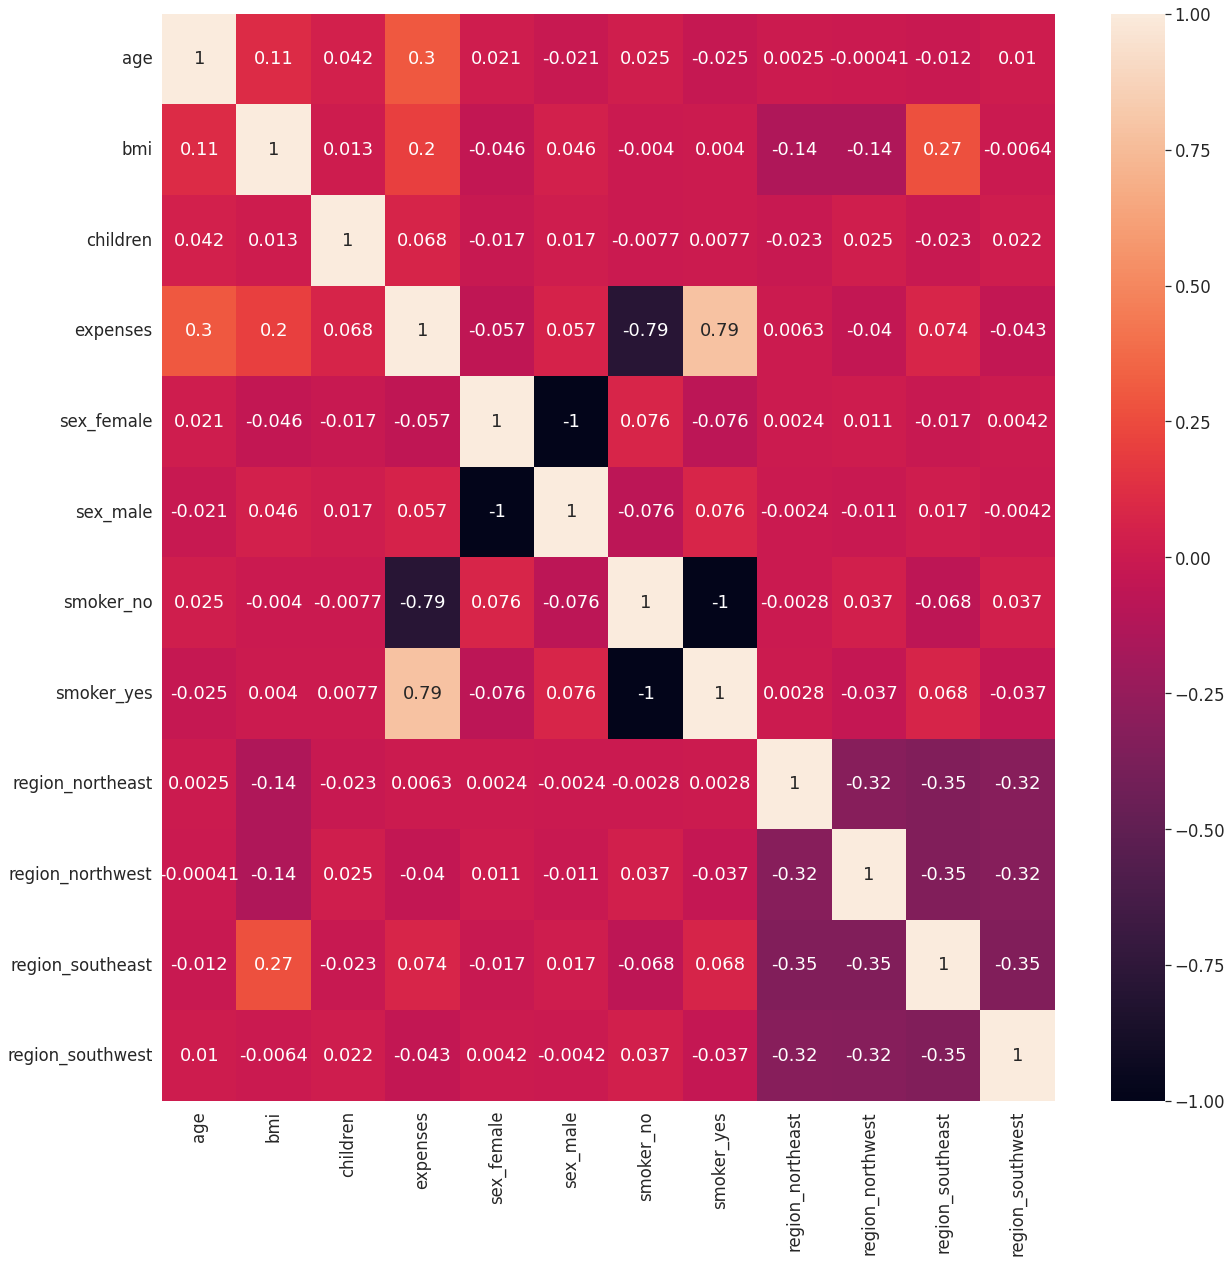

In [17]:
#checking the correlation among the features
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)

In [18]:
X = df_new.drop(columns="expenses")
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0,0,1,0,0
1334,18,31.9,0,1,0,1,0,1,0,0,0
1335,18,36.9,0,1,0,1,0,0,0,1,0
1336,21,25.8,0,1,0,1,0,0,0,0,1


In [19]:
y = df_new[['expenses']]
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [20]:
#splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [21]:
#linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [23]:
print("Linear regression summary:")
print(model.score(X_test, y_test))
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE: {}".format(mae))


Linear regression summary:
0.7163833311442901
MAE: 4302.45715112872


Text(0, 0.5, 'Expenses')

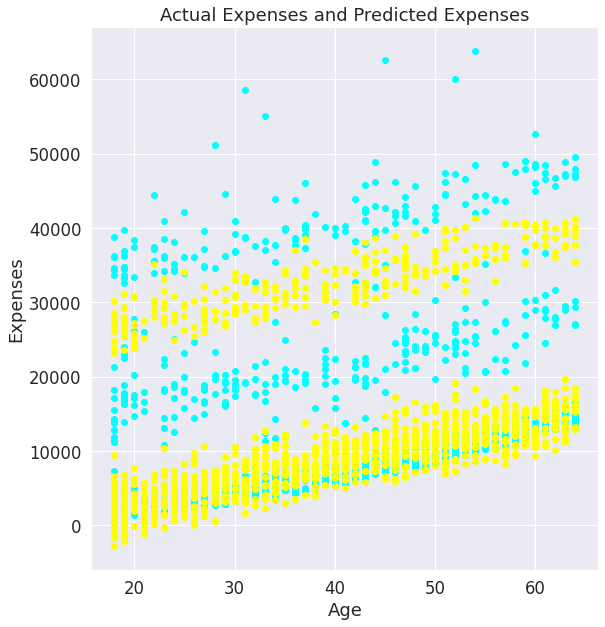

In [24]:
# Age vs Expenses
plt.subplots(figsize=(20,10))  

plt.subplot(1,2,1)
plt.scatter(df['age'], y, color = 'aqua')
plt.scatter(df['age'], model.predict(X), color = 'yellow')
plt.title('Actual Expenses and Predicted Expenses')
plt.xlabel('Age')
plt.ylabel('Expenses')


In [39]:
model_forest = RandomForestRegressor(random_state=1).fit(X_train, y_train.values.ravel())


In [40]:
y_train_forest = model_forest.predict(X_train)
y_test_forest_preds = model_forest.predict(X_test)

In [41]:
mae_forest = mean_absolute_error(y_test, y_test_forest_preds)
print("Forest model info")
print(model_forest.score(X_test, y_test))
print("MAE: {}".format(mae_forest))

Forest model info
0.8339281534061561
MAE: 2669.2856128358203


Text(0, 0.5, 'Expenses')

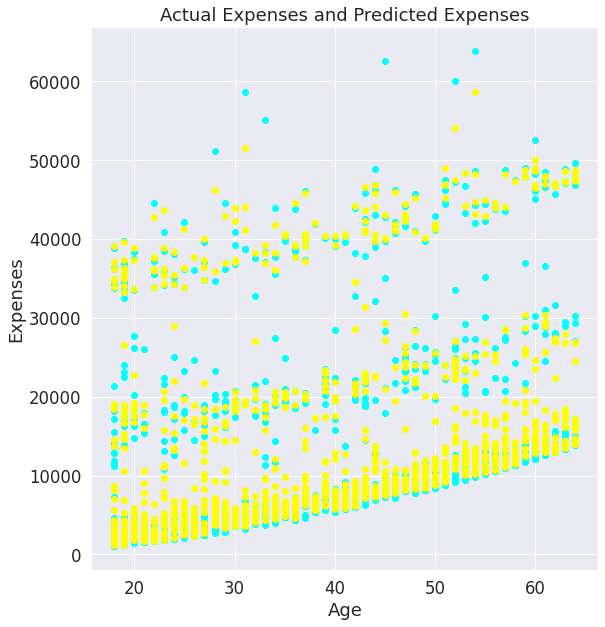

In [42]:
# Age vs Expenses
plt.subplots(figsize=(20,10))  

plt.subplot(1,2,1)
plt.scatter(df['age'], y, color = 'aqua')
plt.scatter(df['age'], model_forest.predict(X), color = 'yellow')
plt.title('Actual Expenses and Predicted Expenses')
plt.xlabel('Age')
plt.ylabel('Expenses')


In [43]:
GBR=GradientBoostingRegressor()
params_GBR= {'n_estimators':[10, 50, 100, 300, 500],
             'max_depth':[2, 5, 8,10],
              'min_samples_split':[2,5,10,15,20,25],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
               'min_samples_leaf':[1,2,5,7,8,10],
              'max_features':['log2', 'sqrt']}

DTR=DecisionTreeRegressor()
params_DTR= {  'max_depth':[2, 5,8,10],
                'min_samples_split':[2,5,10,15,20,25]}

KNNR= KNeighborsRegressor()
params_KNNR= {'n_neighbors':list(range(3,24,3)),
              'weights':['uniform', 'distance'],
              'leaf_size':list(range(1,5)),
              'p':[1,2]}




In [47]:
for i,j,k in zip([DTR,KNNR,GBR],[params_DTR,params_KNNR,params_GBR],['DTR','KNNR','GBR']):
  grid= GridSearchCV(estimator=i, param_grid=j,cv=5,n_jobs=-1,scoring=make_scorer(r2_score))
  grid.fit(X_train,y_train.values.ravel())
  print(f'{k}= ')
  print('-'.center(20,'-'))
  print(f'r2 score:{grid.best_score_}')
  print(f'Best Parameter=')
  print(grid.best_params_)
  print('xxx'.center(100,'-'))
  print('xxx'.center(100,'-'))

DTR= 
--------------------
r2 score:0.8340789056395981
Best Parameter=
{'max_depth': 5, 'min_samples_split': 25}
------------------------------------------------xxx-------------------------------------------------
------------------------------------------------xxx-------------------------------------------------
KNNR= 
--------------------
r2 score:0.5440707044405474
Best Parameter=
{'leaf_size': 1, 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
------------------------------------------------xxx-------------------------------------------------
------------------------------------------------xxx-------------------------------------------------
GBR= 
--------------------
r2 score:0.8525179222544939
Best Parameter=
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 500}
------------------------------------------------xxx-------------------------------------------------
----------------------------------------

In [59]:
model_gbr=GradientBoostingRegressor(learning_rate=0.01, max_depth =5, max_features = 'sqrt', min_samples_leaf = 8, min_samples_split = 15, n_estimators =500)

In [68]:
best_model= model_gbr.fit(X_train,y_train)


In [69]:
filename = 'best-model_gbr.pkl'

with open(filename, 'wb') as file:  
    pickle.dump(best_model, file)

In [70]:
# Load the Model back from file
filename = 'best-model_gbr.pkl'
with open(filename, 'rb') as file:  
    model_loaded = pickle.load(file)

In [71]:
model_loaded

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_leaf=8, min_samples_split=15,
                          n_estimators=500)

In [78]:
pred=model_loaded.predict(np.array([70,29,1,0,1,0,1,0,0,1,0]).reshape(1,11))[0]

In [79]:
print('{0}'.format(pred))


29608.9183585312
